In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-population-dataset/world_population.csv


# 1 - import libraries and Read Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/world-population-dataset/world_population.csv')
df

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [4]:
# see the dataframe head
df.head(20)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
6,224,AIA,Anguilla,The Valley,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.2527,1.0066,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00
8,33,ARG,Argentina,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.3683,1.0052,0.57
9,140,ARM,Armenia,Yerevan,Asia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.4831,0.9962,0.03


In [5]:
# the shape of the dataframe
df.shape

(234, 17)

In [6]:
# see the summary information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [7]:
df.rename(columns={"id": "ID"}, inplace=True)
df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [8]:
# see the describtion of the numeric columns in the datafeame
print(f"Summary Of The Dataset with numerical columns :")

pd.options.display.float_format = '{:.2f}'.format
description = df.describe()
description

Summary Of The Dataset with numerical columns :


,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00
mean,117.50,34074414.71,33501070.95,31729956.24,29845235.03,26269468.82,22710220.79,18984616.97,15786908.81,581449.38,452.13,1.01,0.43
std,67.69,136766424.80,135589876.92,130404992.75,124218487.63,111698206.72,97832173.35,81785186.08,67795091.64,1761840.86,2066.12,0.01,1.71
min,1.00,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,0.03,0.91,0.00
25%,59.25,419738.50,415284.50,404676.00,393149.00,327242.00,264115.75,229614.25,155997.00,2650.00,38.42,1.00,0.01
50%,117.50,5559944.50,5493074.50,5307400.00,4942770.50,4292907.00,3825409.50,3141145.50,2604830.00,81199.50,95.35,1.01,0.07
75%,175.75,22476504.75,21447979.50,19730853.75,19159567.50,15762301.00,11869231.00,9826053.75,8817329.00,430425.75,238.93,1.02,0.28
max,234.00,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,17098242.00,23172.27,1.07,17.88


In [9]:
# see the describtion of the catergorical columns in the datafeame

print("Summary Of The Dataset with catergorical columns :")
df.describe(include='object')

Summary Of The Dataset with catergorical columns :


,CCA3,Country/Territory,Capital,Continent
count,234,234,234,234
unique,234,234,234,6
top,AFG,Afghanistan,Kabul,Africa
freq,1,1,1,57


#  Exploratoy Data Analysis

In [10]:
# check the correlations between all the numeric columns

df.corr(numeric_only  = True)

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.00,-0.36,-0.36,-0.35,-0.35,-0.34,-0.34,-0.34,-0.34,-0.38,0.13,-0.22,-0.36
2022 Population,-0.36,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.97,0.45,-0.03,-0.02,1.00
2020 Population,-0.36,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.98,0.45,-0.03,-0.03,1.00
2015 Population,-0.35,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.46,-0.03,-0.03,1.00
2010 Population,-0.35,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.46,-0.03,-0.04,1.00
2000 Population,-0.34,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.47,-0.03,-0.05,0.99
1990 Population,-0.34,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,0.49,-0.03,-0.06,0.99
1980 Population,-0.34,0.98,0.98,0.99,0.99,1.00,1.00,1.00,1.00,0.50,-0.03,-0.07,0.98
1970 Population,-0.34,0.97,0.98,0.98,0.98,0.99,1.00,1.00,1.00,0.51,-0.03,-0.08,0.97
Area (km²),-0.38,0.45,0.45,0.46,0.46,0.47,0.49,0.50,0.51,1.00,-0.06,-0.01,0.45


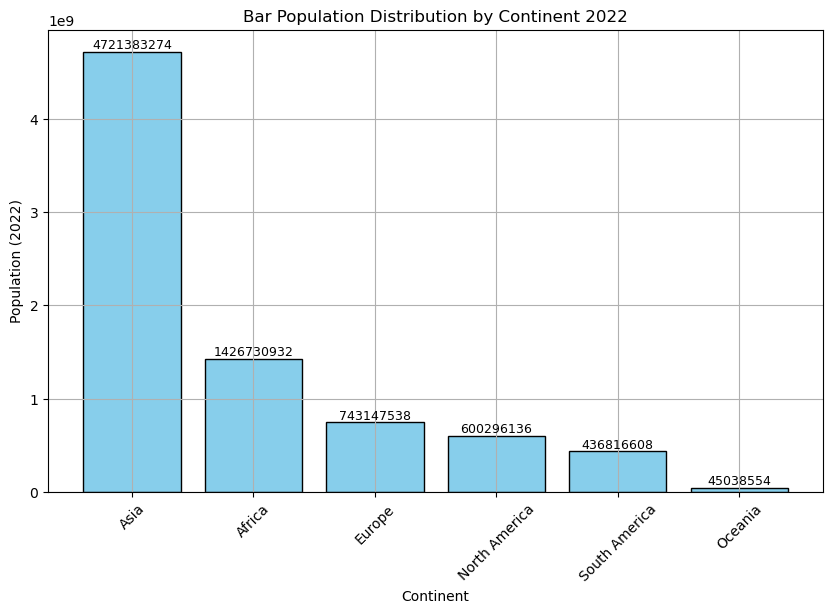

In [11]:
# make a plot for Population Distribution by Continent
grouped_df = df.groupby('Continent').sum(numeric_only=True).sort_values(by="2022 Population", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(grouped_df.index, grouped_df['2022 Population'], color='skyblue', edgecolor='black')
plt.xlabel('Continent')
plt.ylabel('Population (2022)')
plt.title('Bar Population Distribution by Continent 2022')
plt.xticks(rotation=45)
plt.grid(True)

# Adding data labels above each bar
for i, v in enumerate(grouped_df['2022 Population']):
    plt.text(i, v + 500000, str(v), ha='center', va='bottom', fontsize=9)

plt.show()

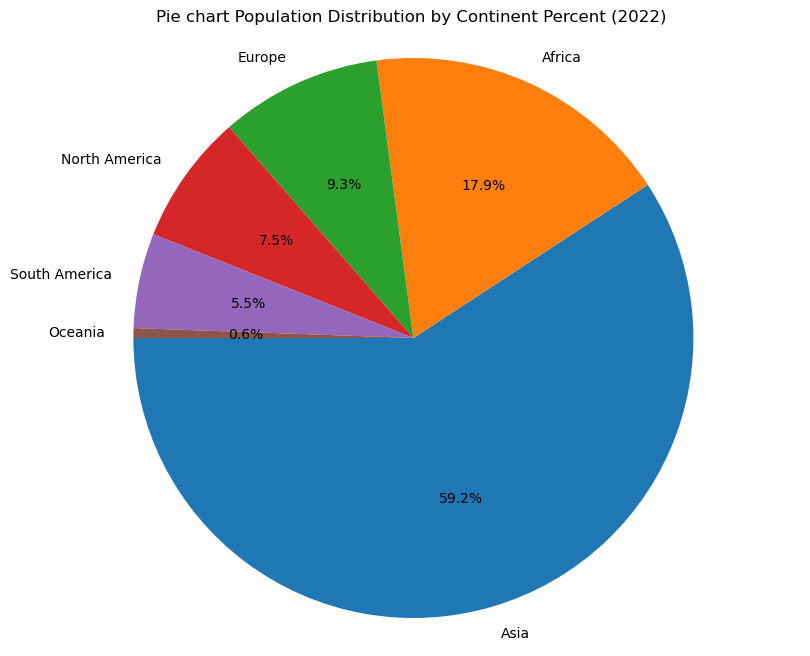

In [12]:
# create a pie graph for Population Distribution by Continent (2022)

grouped_df = df.groupby('Continent').sum(numeric_only=True).sort_values(by="2022 Population", ascending=False)

labels = grouped_df.index.tolist()
sizes = grouped_df["2022 Population"].tolist()

plt.figure(figsize=(10, 8))  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180)  
plt.axis('equal')  
plt.title("Pie chart Population Distribution by Continent Percent (2022) ")  
plt.show()

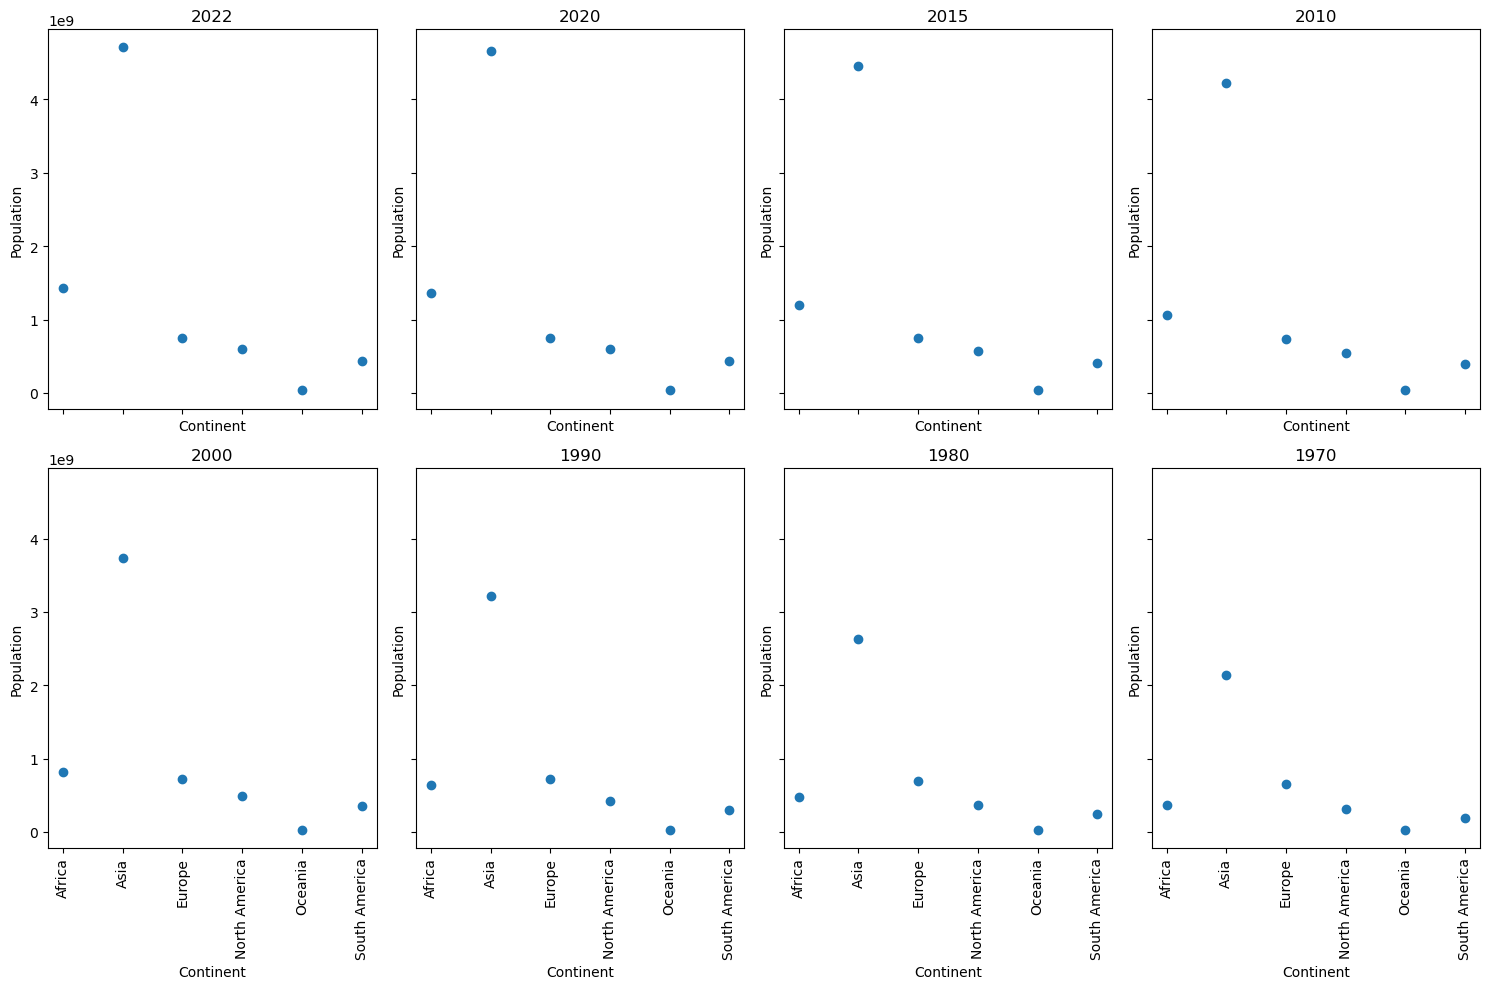

In [13]:
# Group the data by continent and calculate the sum of population for each year
grouped_data = df.groupby('Continent').agg({
    '2022 Population': 'sum',
    '2020 Population': 'sum',
    '2015 Population': 'sum',
    '2010 Population': 'sum',
    '2000 Population': 'sum',
    '1990 Population': 'sum',
    '1980 Population': 'sum',
    '1970 Population': 'sum'
}).reset_index()

years = ['2022', '2020', '2015', '2010', '2000', '1990', '1980', '1970']

fig, axes = plt.subplots(2, 4, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.ravel()

# Loop through the years and create a scatter plot for each continent
for i, year in enumerate(years):
    axes[i].scatter(grouped_data['Continent'], grouped_data[year + ' Population'])
    axes[i].set_title(year)
    axes[i].set_xlabel('Continent')
    axes[i].set_ylabel('Population')
    axes[i].set_xticks(range(len(grouped_data['Continent'])))
    axes[i].set_xticklabels(grouped_data['Continent'], rotation=90)

plt.tight_layout()
plt.show()

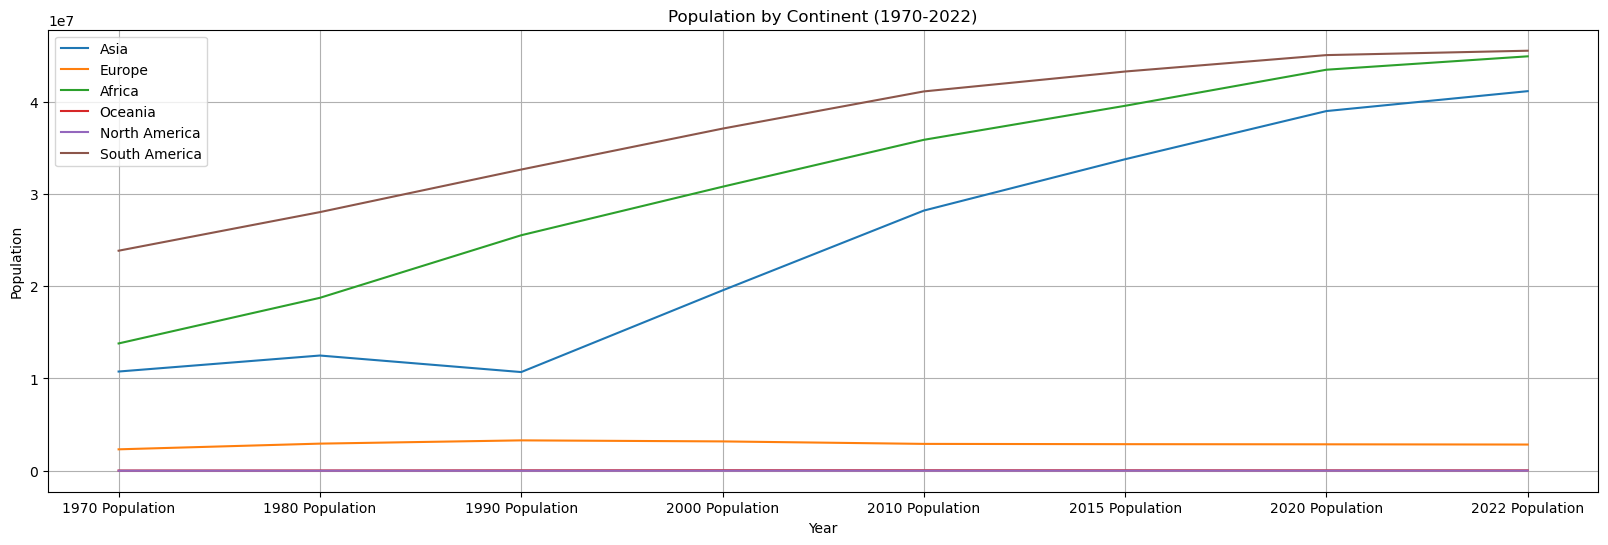

In [14]:
# 'Population by Continent (1970-2022)'

data = {
    "Continent": df['Continent'],
    "1970 Population": df['1970 Population'],
    "1980 Population": df['1980 Population'],
    "1990 Population": df['1990 Population'],
    "2000 Population": df['2000 Population'],
    "2010 Population": df['2010 Population'],
    "2015 Population": df['2015 Population'],
    "2020 Population": df['2020 Population'],
    "2022 Population": df['2022 Population']
}

df_pop_by_continent = pd.DataFrame(data)

# Plotting
years = df_pop_by_continent.columns[1:]  
plt.figure(figsize=(20, 6))
for continent in df_pop_by_continent["Continent"].unique():
    continent_data = df_pop_by_continent[df_pop_by_continent["Continent"] == continent].iloc[0, 1:]
    plt.plot(years, continent_data, label=continent)

plt.title('Population by Continent (1970-2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


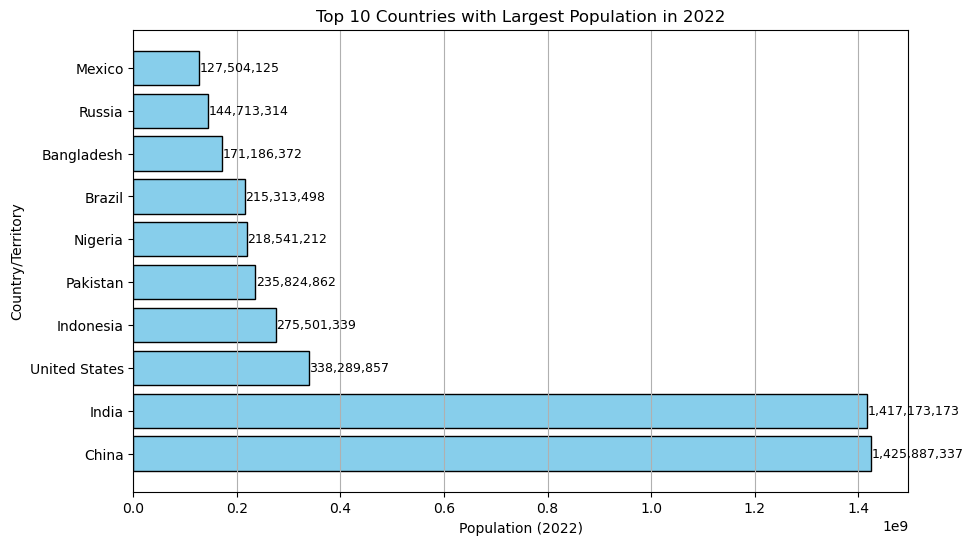

In [15]:
# Plotting a horizontal bar chart to show the top 5 countries with the largest population in 2022
top_5_population = df.nlargest(10, '2022 Population')

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_population['Country/Territory'], top_5_population['2022 Population'], color='skyblue', edgecolor='black')

plt.xlabel('Population (2022)')
plt.ylabel('Country/Territory')
plt.title('Top 10 Countries with Largest Population in 2022')
plt.grid(axis='x')

# Adding data labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1000000, bar.get_y() + bar.get_height() / 2, f'{width:,}', ha='left', va='center', fontsize=9)

plt.show()

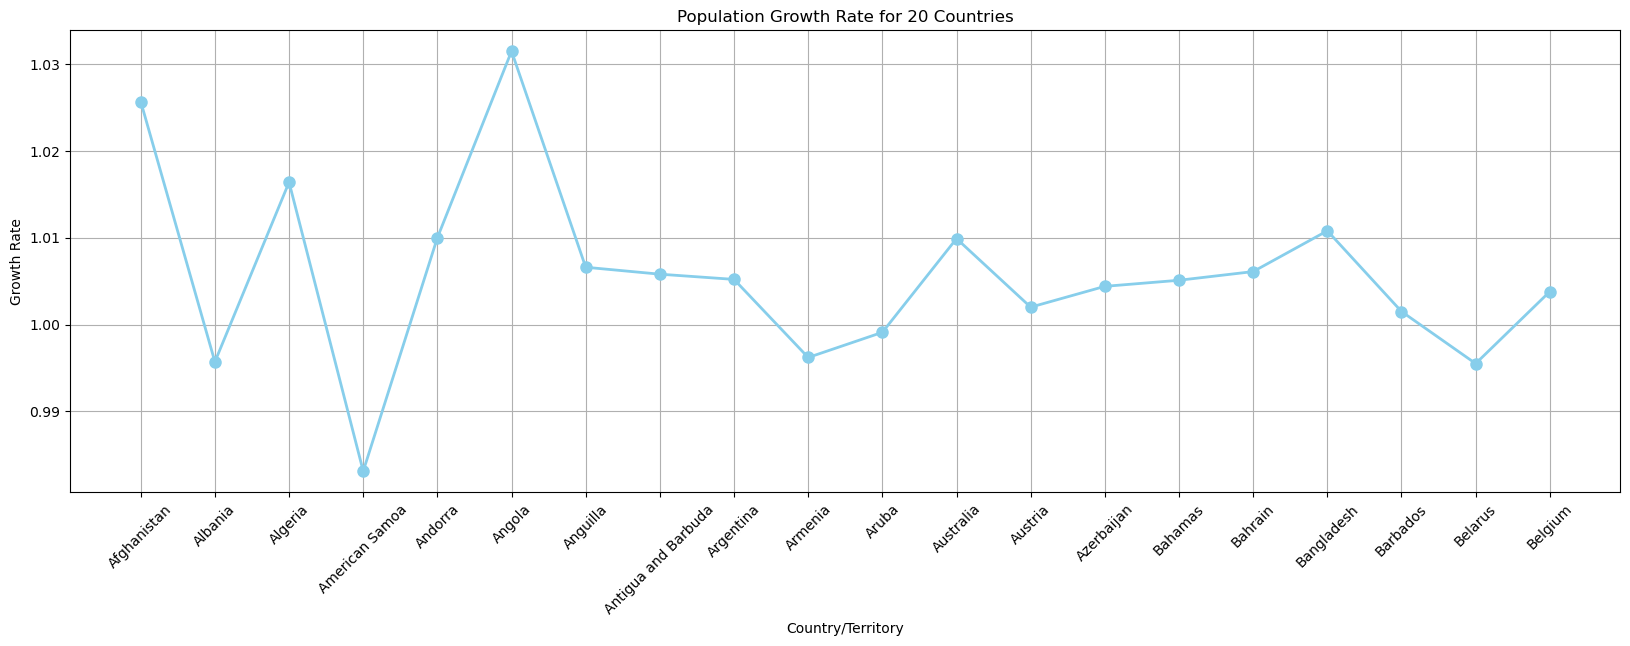

In [16]:
# Plot a line chart of the population growth rate for individual countries to identify trends.
x = df['Country/Territory'].head(20)
y = df['Growth Rate'].head(20)
plt.figure(figsize=(20, 6))
plt.plot(x, y, marker='o', markersize=8, color='skyblue', linewidth=2)
plt.xlabel('Country/Territory')
plt.ylabel('Growth Rate')
plt.title('Population Growth Rate for 20 Countries')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

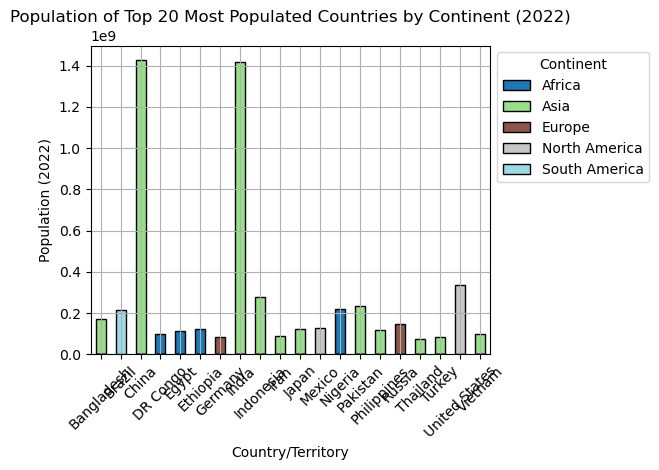

In [17]:
N = 20  
top_countries = df.sort_values(by='2022 Population', ascending=False).head(N)

pivot_df = top_countries.pivot(index='Country/Territory', columns='Continent', values='2022 Population')
pivot_df.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')
plt.xlabel('Country/Territory')
plt.ylabel('Population (2022)')
plt.title(f'Population of Top {N} Most Populated Countries by Continent (2022)')
plt.xticks(rotation=45)
plt.legend(title='Continent', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

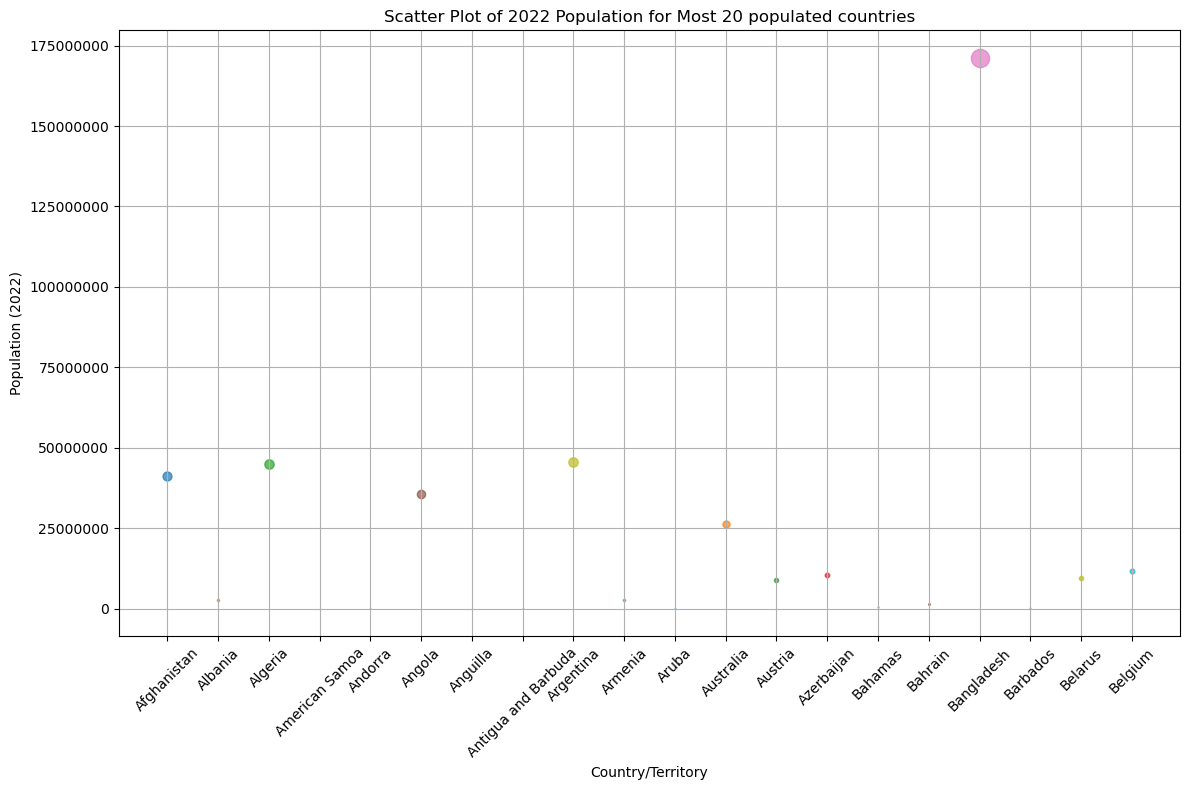

In [18]:
plt.figure(figsize=(12, 8))

x = df['Country/Territory'].head(20)
y = df['2022 Population'].head(20)

# Plot the scatter plot with country names and numbers on y-axis
marker_sizes = df['2022 Population'] / 50000  
for i, country in enumerate(x):
    plt.scatter(country, y.iloc[i], s=(marker_sizes.iloc[i])/20, label=country, alpha=0.7)

# Set y-axis to display numbers in billions
plt.ticklabel_format(style='plain', axis='y', useOffset=False, scilimits=(9, 9))

plt.xlabel('Country/Territory')
plt.ylabel('Population (2022)')
plt.title('Scatter Plot of 2022 Population for Most 20 populated countries')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


/tmp/ipykernel_121/1094533981.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 1200x800 with 0 Axes>

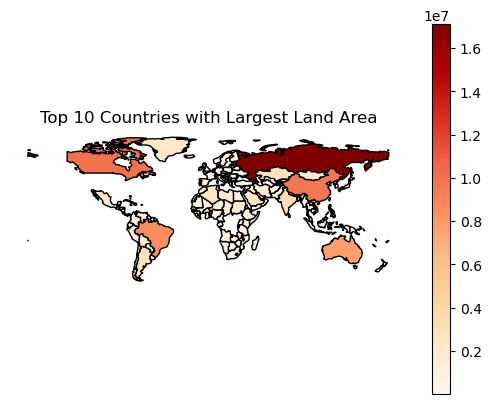

In [19]:
# Plotting a world map to visualize the top 10 countries with the largest land area
import geopandas as gpd

world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world_map.merge(df, left_on='name', right_on='Country/Territory')

plt.figure(figsize=(12, 8))
merged_data.plot(column='Area (km²)', cmap='OrRd', legend=True, edgecolor='black')
plt.title('Top 10 Countries with Largest Land Area')
plt.axis('off')
plt.show()